$$
f(x) = \frac{1}{1 + e^{-x}}
$$

when given columns are limited then we prefer this for probalistic analysis

In [212]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [184]:
df = pd.read_csv('data/insurance_data.csv')

In [185]:
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [186]:
df.tail()

,age,bought_insurance
22,40,1
23,45,1
24,50,1
25,54,1
26,23,0


In [187]:
df.describe()

,age,bought_insurance
count,27.000000,27.000000
mean,39.666667,0.518519
std,15.745573,0.509175
min,18.000000,0.000000
25%,25.000000,0.000000
50%,45.000000,1.000000
75%,54.500000,1.000000
max,62.000000,1.000000


In [189]:
df.isnull().sum()

age                 0
bought_insurance    0
dtype: int64

In [192]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               27 non-null     int64
 1   bought_insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 564.0 bytes


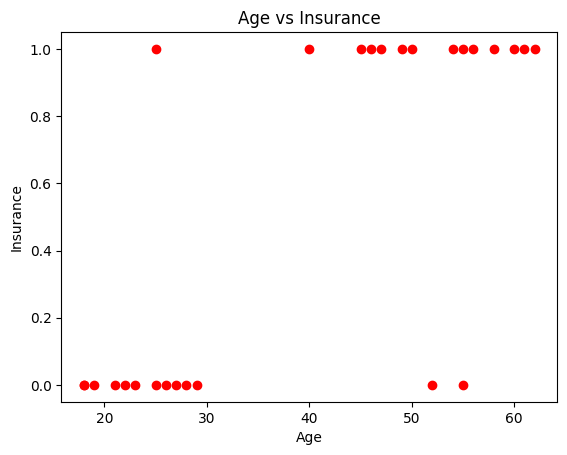

In [197]:
plt.scatter(df.age, df.bought_insurance, color='red', marker='o')
plt.title('Age vs Insurance')
plt.xlabel('Age')
plt.ylabel('Insurance')
plt.show()

In [199]:
df.shape

(27, 2)

In [202]:
X = df.drop(columns=['bought_insurance'])
y = df.bought_insurance

In [203]:
X

,age
0,22
1,25
2,47
3,52
4,46
5,56
6,55
7,60
8,62
9,61


In [204]:
y

0     0
1     0
2     1
3     0
4     1
5     1
6     0
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    1
15    1
16    1
17    1
18    0
19    0
20    0
21    0
22    1
23    1
24    1
25    1
26    0
Name: bought_insurance, dtype: int64

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [206]:
X_train

,age
23,45
13,29
19,18
20,21
16,25
1,25
10,18
26,23
25,54
8,62


In [207]:
X_test

,age
2,47
24,50
14,49
17,58
5,56
11,28


In [208]:
y_train

23    1
13    0
19    0
20    0
16    1
1     0
10    0
26    0
25    1
8     1
6     0
4     1
18    0
9     1
7     1
22    1
3     0
0     0
21    0
15    1
12    0
Name: bought_insurance, dtype: int64

In [209]:
y_test

2     1
24    1
14    1
17    1
5     1
11    0
Name: bought_insurance, dtype: int64

In [215]:
model = LogisticRegression()

In [216]:
model.fit(X_train, y_train)

LogisticRegression()

In [218]:
y_predict = model.predict(X_test)

In [219]:
y_predict

array([1, 1, 1, 1, 1, 0])

In [220]:
pd.DataFrame({'y_test': y_test, 'y_predict': y_predict})

,y_test,y_predict
2,1,1
24,1,1
14,1,1
17,1,1
5,1,1
11,0,0


In [221]:
model.predict_proba(X_test)

array([[0.34030833, 0.65969167],
       [0.26925593, 0.73074407],
       [0.2918862 , 0.7081138 ],
       [0.13059794, 0.86940206],
       [0.15824269, 0.84175731],
       [0.81292397, 0.18707603]])